# Principal Component Analysis with Cancer Data

In [161]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [162]:
bc_df = pd.read_csv("C:/Users/Sapna/Documents/Residency-5/Internal Lab/breast-cancer-wisconsin-data.csv")


In [163]:
print(bc_df.head(10))

        ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0  1000025               5          1           1                  1   
1  1002945               5          4           4                  5   
2  1015425               3          1           1                  1   
3  1016277               6          8           8                  1   
4  1017023               4          1           1                  3   
5  1017122               8         10          10                  8   
6  1018099               1          1           1                  1   
7  1018561               2          1           2                  1   
8  1033078               2          1           1                  1   
9  1033078               4          2           1                  1   

   Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2           1                3                1   
1                            7          10     

In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [164]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [165]:
bc_df.shape

(699, 11)

In [166]:
bc_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


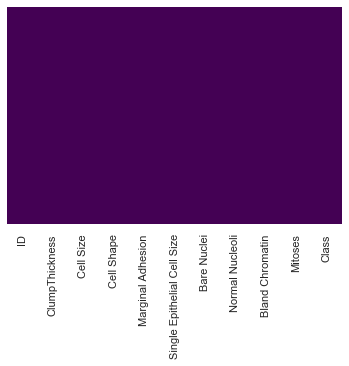

In [167]:
# checking if there are any gaps in data
sns.heatmap(bc_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [168]:
bc_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [169]:
bc_df_copy=bc_df

In [170]:
bc_df['Bare Nuclei']=bc_df['Bare Nuclei'].replace('?',np.NaN)

In [171]:
bc_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [172]:
bc_df['Bare Nuclei'].fillna(bc_df['Bare Nuclei'].median(), inplace=True)

In [173]:
bc_df['Bare Nuclei'].value_counts()

1      402
10     132
2       30
5       30
3       28
8       21
4       19
1.0     16
9        9
7        8
6        4
Name: Bare Nuclei, dtype: int64

In [174]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [175]:
bc_df['Bare Nuclei']=bc_df['Bare Nuclei'].astype(int)

In [176]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.5 KB


In [177]:
bc_df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [195]:
bc_df.drop_duplicates(inplace=True)

In [196]:
bc_df.shape

(690, 11)

In [179]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


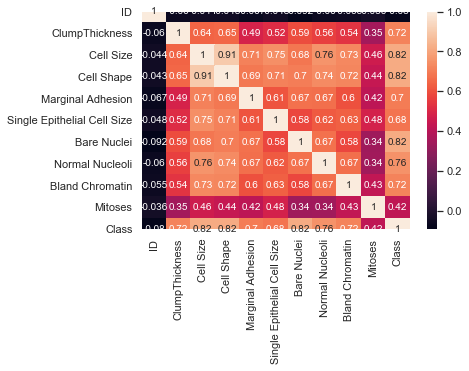

In [197]:
# Check for correlation of variable
sns.heatmap(bc_df.corr(),annot=True)

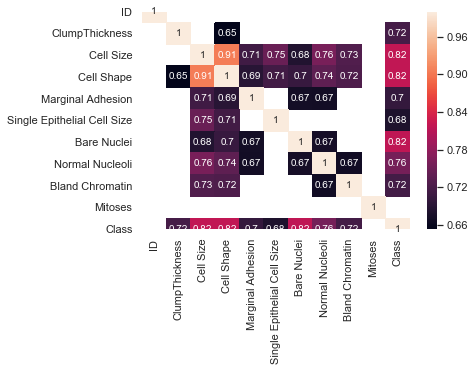

In [198]:
sns.heatmap(bc_df.corr().where(bc_df.corr() > 0.65),annot=True)

It can be seen here that there exists highest correlation among  attributes such as 'Cell shape' and 'Cell size'. Also, 'Class' attribute has high correlation with 'Cell size', 'Cell Shape' and 'Bare Nuclei'.Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli,and bland chromatin. Therefore, it can be summarized that data is not tighly clustered and there is lot of inter collinearity among attributes.

In [182]:
#Let us check for pair plots

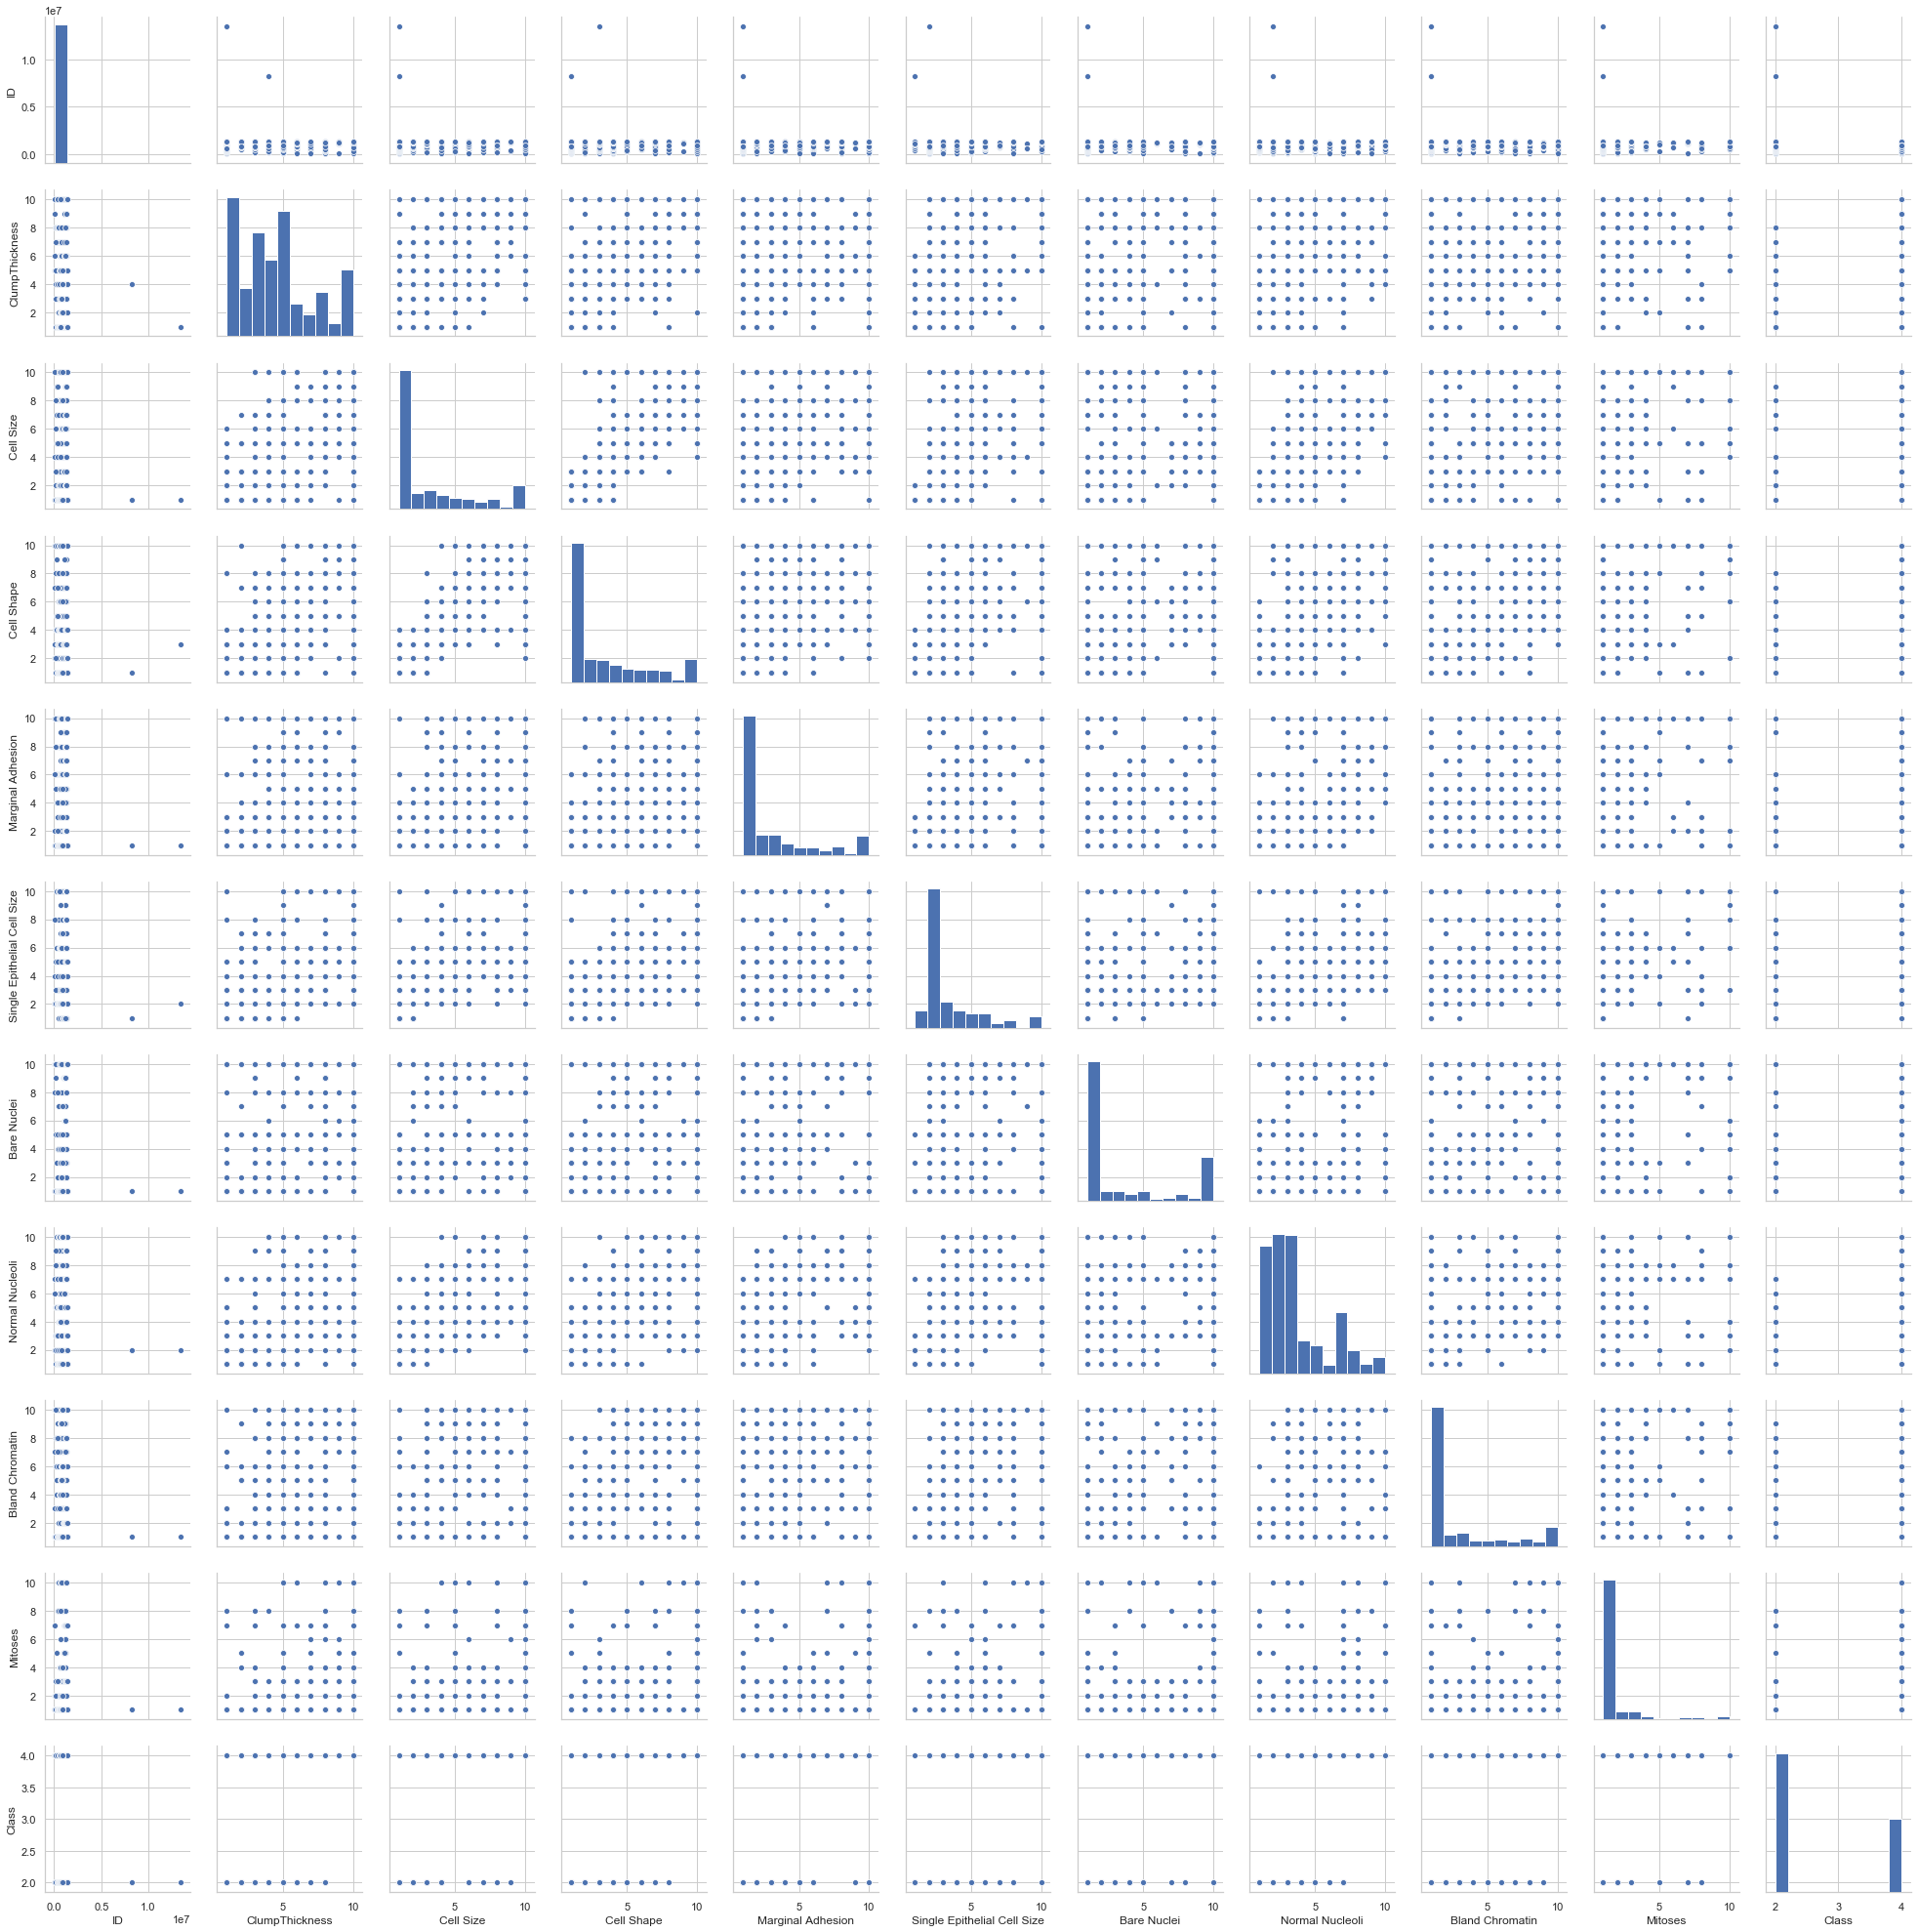

In [183]:
sns.pairplot(bc_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E5F3DBD308>,
      dtype=object)

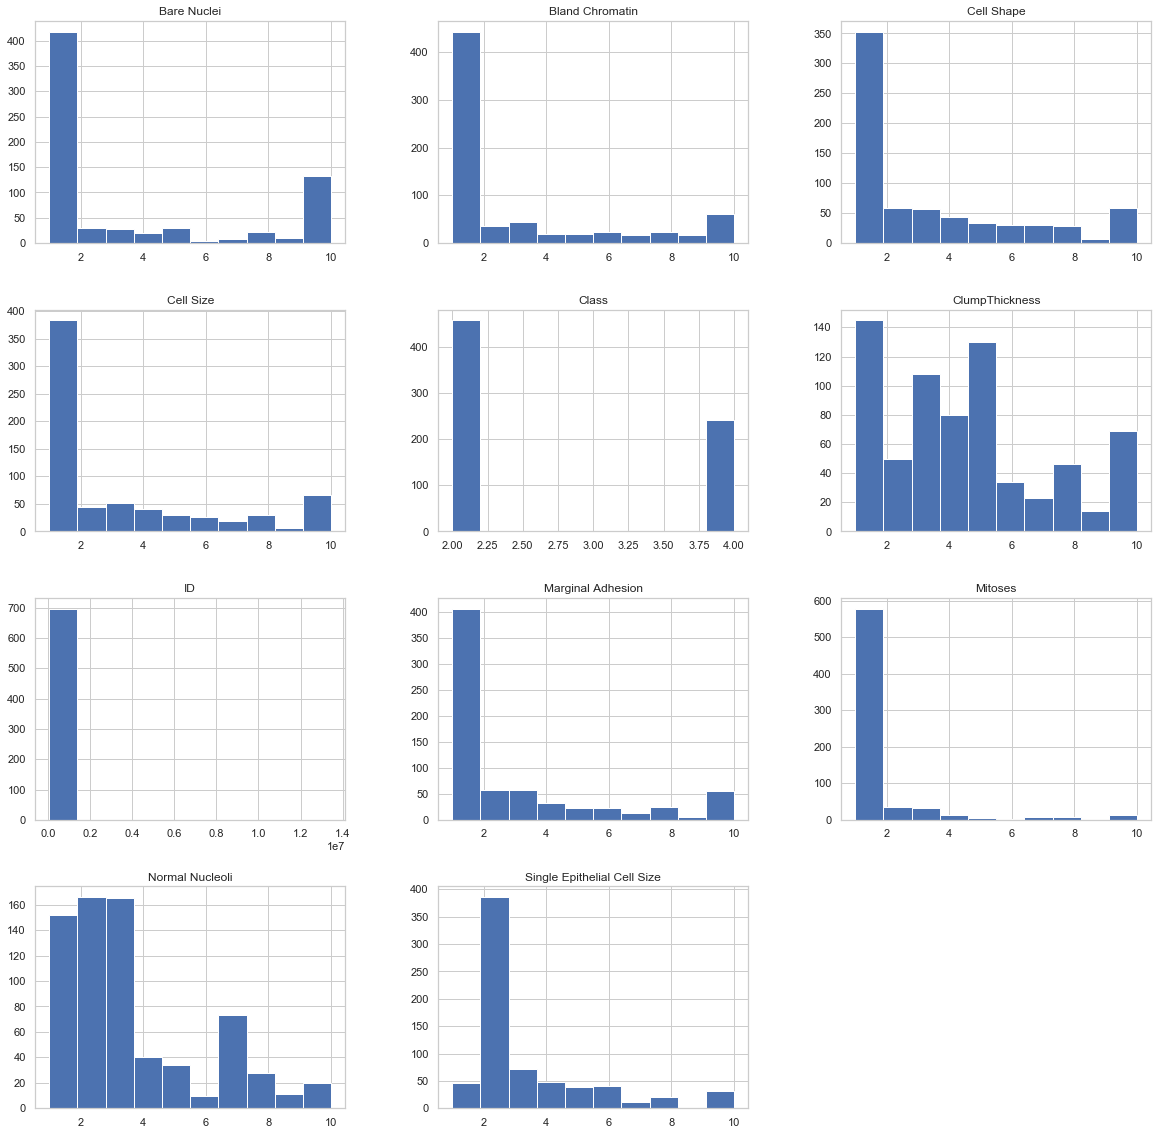

In [184]:
bc_df.hist(figsize=[20,20])

Most of the distributions are right skewed with majority of the values lying bwetween values 0 and 2 as most of the peaks are in this region.Also, the scatter plot show high correlations among the attributes.


# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

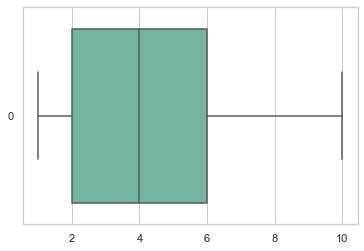

In [185]:
sns.boxplot(data=bc_df['ClumpThickness'], orient='h',palette='Set2')

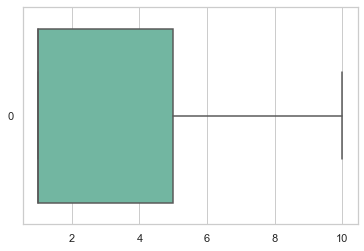

In [186]:
sns.boxplot(data=bc_df['Cell Size'], orient='h',palette='Set2')

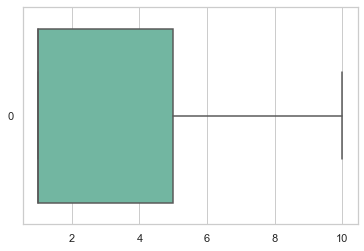

In [187]:
sns.boxplot(data=bc_df['Cell Shape'], orient='h',palette='Set2')

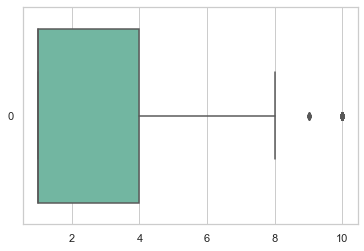

In [188]:
sns.boxplot(data=bc_df['Marginal Adhesion'], orient='h',palette='Set2')

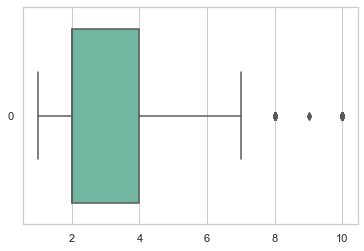

In [189]:
sns.boxplot(data=bc_df['Single Epithelial Cell Size'], orient='h',palette='Set2')

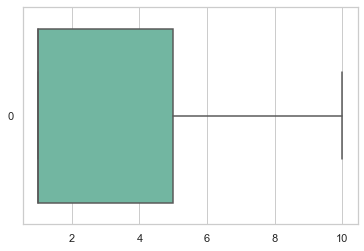

In [190]:
sns.boxplot(data=bc_df['Bare Nuclei'], orient='h',palette='Set2')

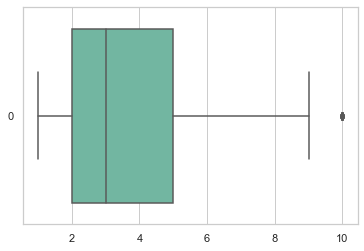

In [191]:
sns.boxplot(data=bc_df['Normal Nucleoli'], orient='h',palette='Set2')

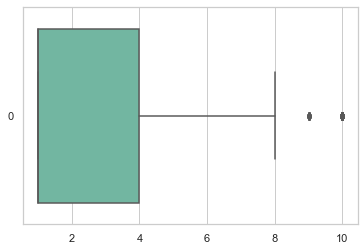

In [192]:
sns.boxplot(data=bc_df['Bland Chromatin'], orient='h',palette='Set2')

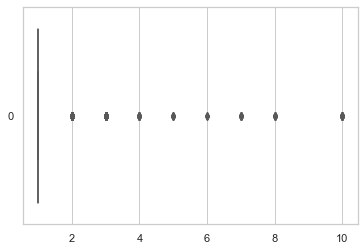

In [193]:
sns.boxplot(data=bc_df['Mitoses'], orient='h',palette='Set2')

In [199]:
bc_df.shape


(690, 11)

In [200]:
bc_box=bc_df.drop(['Class','ID'], axis = 1)

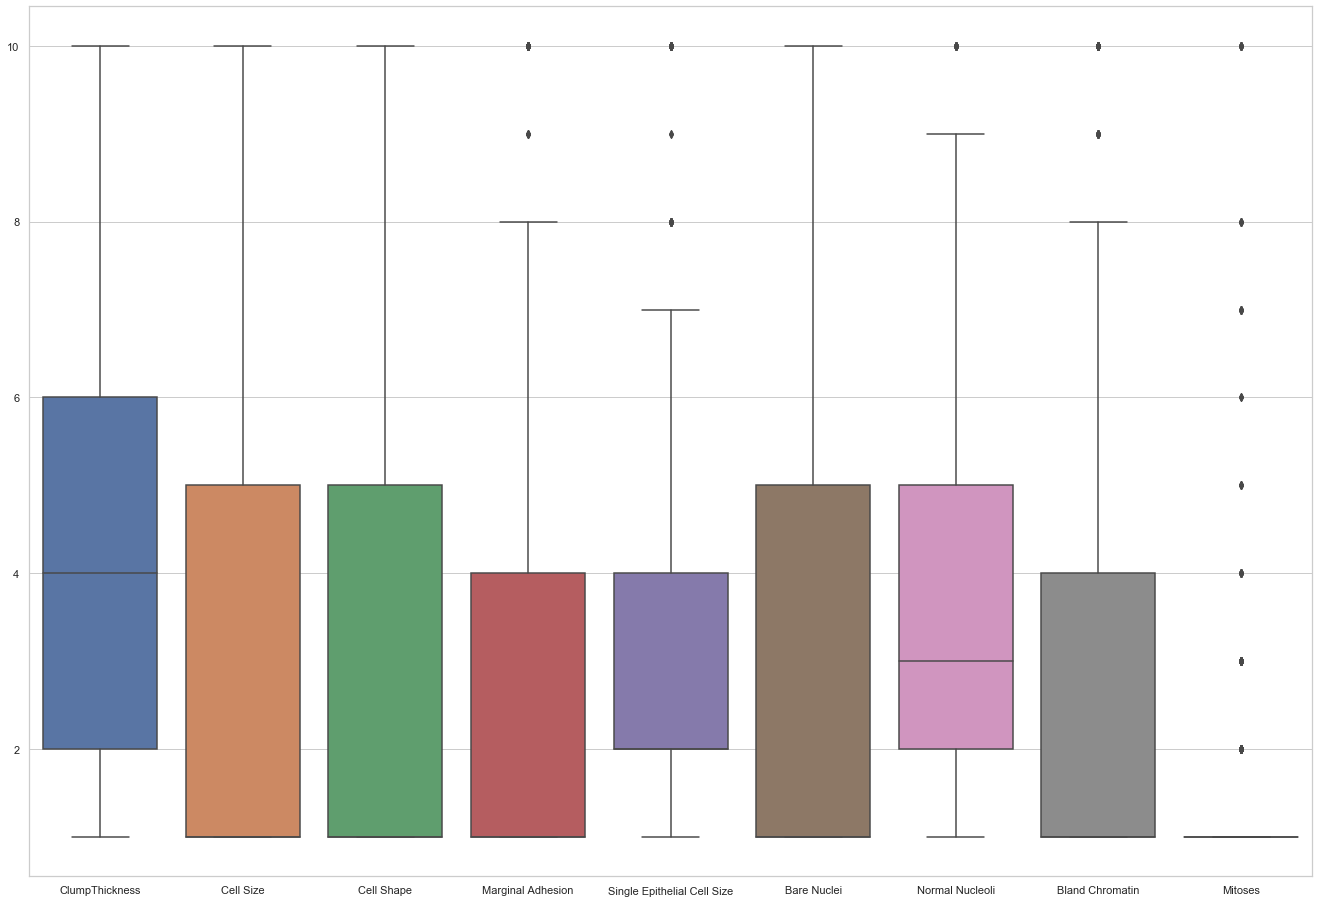

In [201]:
plt.figure(figsize=(23,16))
sns.boxplot(data=bc_box)

In [202]:
Q1 = bc_box.quantile(0.25)
Q3 = bc_box.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

ClumpThickness                 4.0
Cell Size                      4.0
Cell Shape                     4.0
Marginal Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Normal Nucleoli                3.0
Bland Chromatin                3.0
Mitoses                        0.0
dtype: float64


In [203]:
upper_whis=Q3 + (1.5*IQR)
Lower_whis=Q1 - (1.5*IQR)

In [204]:
Lower_whis

ClumpThickness                -4.0
Cell Size                     -5.0
Cell Shape                    -5.0
Marginal Adhesion             -3.5
Single Epithelial Cell Size   -1.0
Bare Nuclei                   -5.0
Normal Nucleoli               -2.5
Bland Chromatin               -3.5
Mitoses                        1.0
dtype: float64

In [205]:
upper_whis

ClumpThickness                 12.0
Cell Size                      11.0
Cell Shape                     11.0
Marginal Adhesion               8.5
Single Epithelial Cell Size     7.0
Bare Nuclei                    11.0
Normal Nucleoli                 9.5
Bland Chromatin                 8.5
Mitoses                         1.0
dtype: float64

In [206]:
bc_df_out=np.where(bc_box > upper_whis,Q3,bc_box)

In [207]:
bc_df_out.shape

(690, 9)

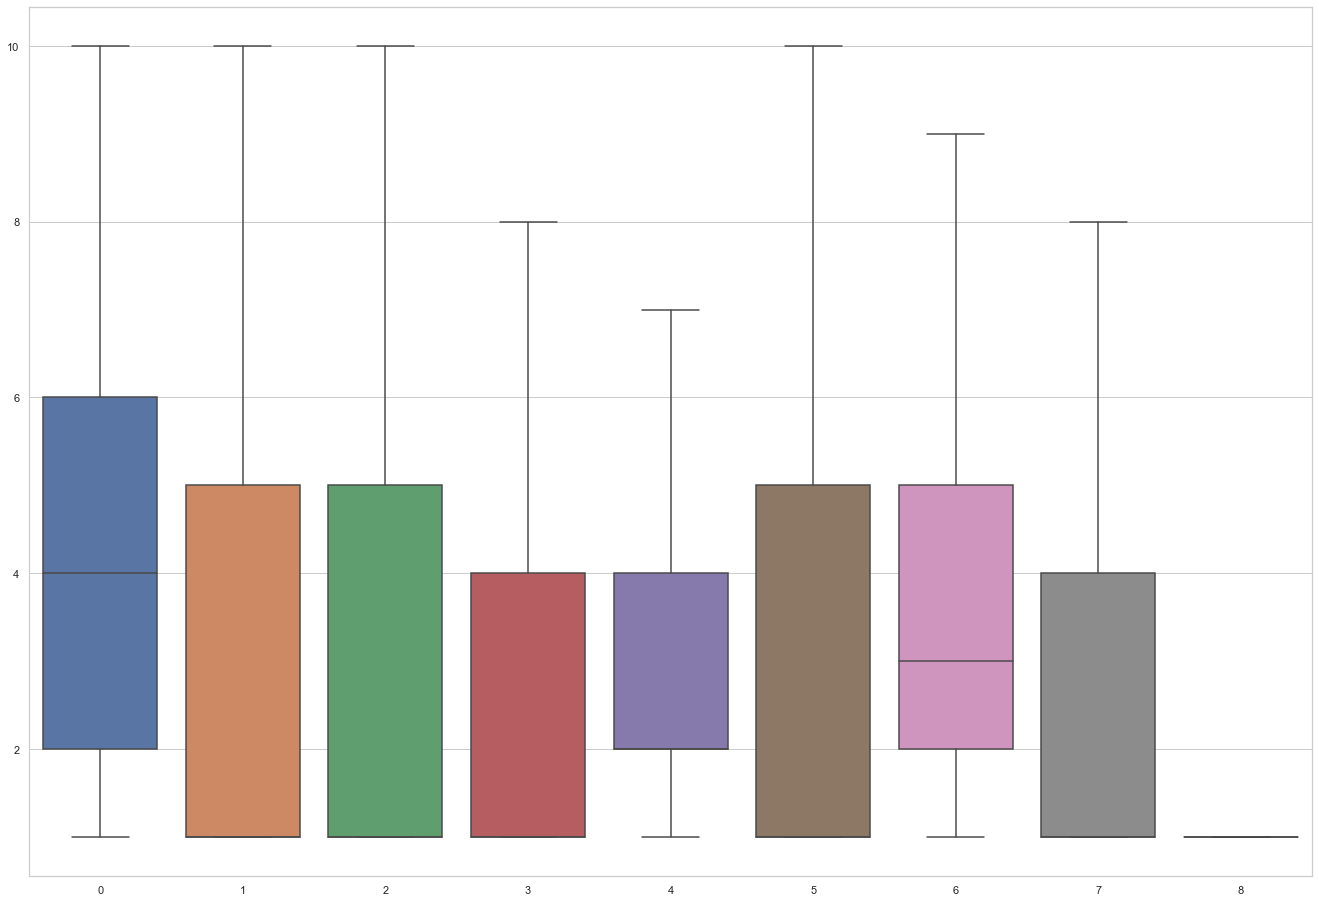

In [144]:
plt.figure(figsize=(23,16))
sns.boxplot(data=bc_df_out)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1,2,1,2
694,3,1,1,1,3,2,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix


In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [208]:
sc = StandardScaler()
bc_std = sc.fit_transform(bc_df_out)  # scale training and test data independently to prevent data leaks

In [210]:
cov_matrix = np.cov(bc_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.49279485 0.53403385 0.59150555
  0.56551502 0.51578744 0.        ]
 [0.64410677 1.00145138 0.9066632  0.69312971 0.73745171 0.68556472
  0.72276807 0.65740596 0.        ]
 [0.65453792 0.9066632  1.00145138 0.66107626 0.71431099 0.70518656
  0.70397842 0.63949795 0.        ]
 [0.49279485 0.69312971 0.66107626 1.00145138 0.64404683 0.64939578
  0.66034173 0.58293653 0.        ]
 [0.53403385 0.73745171 0.71431099 0.64404683 1.00145138 0.62229193
  0.6285222  0.62013468 0.        ]
 [0.59150555 0.68556472 0.70518656 0.64939578 0.62229193 1.00145138
  0.6835083  0.58982763 0.        ]
 [0.56551502 0.72276807 0.70397842 0.66034173 0.6285222  0.6835083
  1.00145138 0.61888241 0.        ]
 [0.51578744 0.65740596 0.63949795 0.58293653 0.62013468 0.58982763
  0.61888241 1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [211]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.31604737 -0.00888914  0.82634557  0.05980487  0.13499436 -0.16552224
  -0.37847444 -0.15731316  0.        ]
 [ 0.38785154 -0.72526838  0.05245436  0.02474312 -0.37748723  0.27730818
   0.27169767 -0.16424745  0.        ]
 [ 0.38390378  0.67952999  0.12851783  0.00164897 -0.36316144  0.36489995
   0.32389918 -0.06624536  0.        ]
 [ 0.34312829  0.05563614 -0.4189233  -0.39913778  0.06302594  0.18287441
  -0.57609519 -0.41840042  0.        ]
 [ 0.35123057  0.03641762 -0.22325389  0.1906435  -0.50305919 -0.53545051
  -0.28155004  0.41240438  0.        ]
 [ 0.35237471 -0.07763428  0.03271821 -0.3809319   0.38727059  0.24254447
   0.04164535  0.71629932  0.        ]
 [ 0.35644858  0.0382504  -0.11097217 -0.23057295  0.32121124 -0.59526257
   0.51377447 -0.29073048  0.        ]
 [ 0.33163182  0.01529543 -0.24322906  0.77580895  0.44406948  0.17098227
  -0.03423686 -0.03378876  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [212]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print("Variance Explained", var_exp)
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Variance Explained [69.32428002542109, 6.811180268800905, 5.522876813646465, 5.226100156441904, 4.246087669603939, 4.02968421817098, 3.703167369656763, 1.1366234782579432, 0.0]
Cumulative Variance Explained [ 69.32428003  76.13546029  81.65833711  86.88443726  91.13052493
  95.16020915  98.86337652 100.         100.        ]


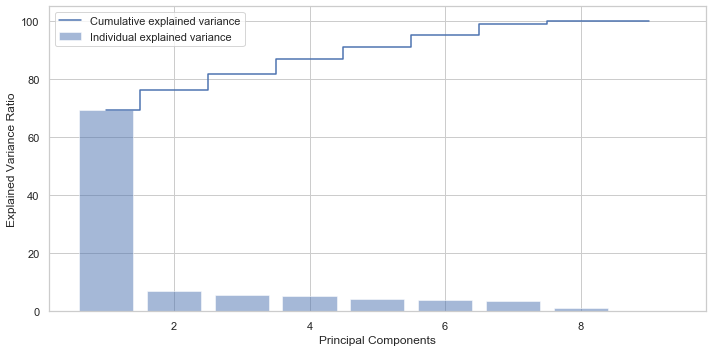

In [213]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [251]:
bc_pca = PCA(n_components=6,random_state=1)
bc_pca.fit(bc_std)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [252]:
X_bc_pca = bc_pca.transform(bc_std)

In [253]:
X_bc_pca.shape

(690, 6)

# Q10 Find correlation between components and features

In [254]:
bc_pca.components_

array([[ 0.31604737,  0.38785154,  0.38390378,  0.34312829,  0.35123057,
         0.35237471,  0.35644858,  0.33163182, -0.        ],
       [ 0.82634557,  0.05245436,  0.12851783, -0.4189233 , -0.22325389,
         0.03271821, -0.11097217, -0.24322906, -0.        ],
       [ 0.05980487,  0.02474312,  0.00164897, -0.39913778,  0.1906435 ,
        -0.3809319 , -0.23057295,  0.77580895,  0.        ],
       [-0.13499436,  0.37748723,  0.36316144, -0.06302594,  0.50305919,
        -0.38727059, -0.32121124, -0.44406948,  0.        ],
       [ 0.37847444, -0.27169767, -0.32389918,  0.57609519,  0.28155004,
        -0.04164535, -0.51377447,  0.03423686,  0.        ],
       [-0.15731316, -0.16424745, -0.06624536, -0.41840042,  0.41240438,
         0.71629932, -0.29073048, -0.03378876,  0.        ]])

In [257]:
bc_pca.components_.shape

(6, 9)

In [258]:
bc_pca.explained_variance_

array([5.55399167, 0.54568527, 0.44247141, 0.41869482, 0.34018003,
       0.32284263])

In [259]:
bc_pca.explained_variance_ratio_

array([0.6932428 , 0.0681118 , 0.05522877, 0.052261  , 0.04246088,
       0.04029684])

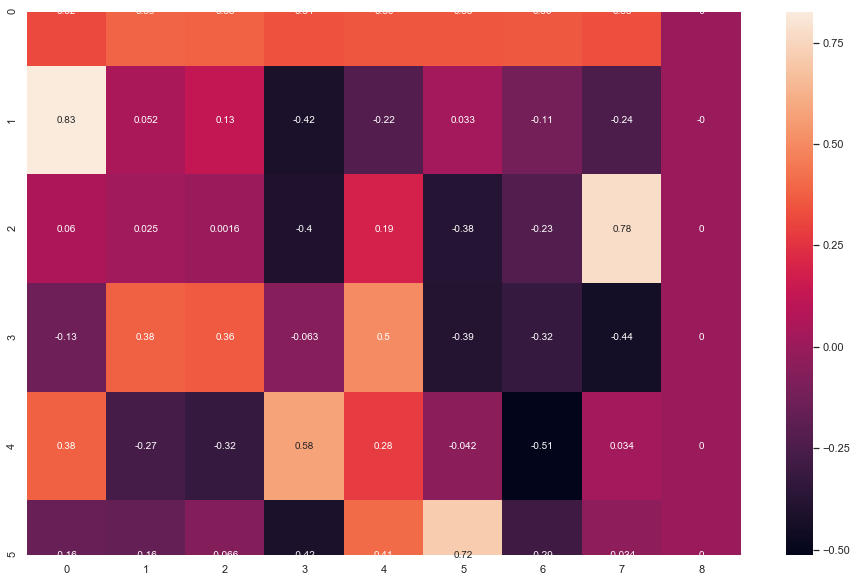

In [268]:
plt.figure(figsize=(16,10))
sns.heatmap(bc_pca.components_,annot=True)

It can be seen, that the correlation among the features is totally reduced in the dataset.

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [270]:
jokes_df = pd.read_csv("C:/Users/Sapna/Documents/Residency-5/Internal Lab/jokes.csv")

In [271]:
jokes_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [272]:
jokes_df.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [274]:
rating_df=jokes_df.drop('NumJokes',axis=1)

In [275]:
rating_df.shape

(24983, 100)

In [284]:
jokes_df=rating_df[:200]

In [285]:
jokes_df.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [288]:
jokes_df=jokes_df.replace(99,0)

In [292]:
jokes_df.shape

(200, 100)

In [297]:
jokes_df.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [293]:
ratings_diff=jokes_df.mean()

In [296]:
ratings_diff.head(10)

Joke1     0.53005
Joke2     0.59390
Joke3     0.23765
Joke4    -0.70100
Joke5    -0.03790
Joke6     1.32005
Joke7     0.17150
Joke8    -0.08530
Joke9     0.01670
Joke10    0.89470
dtype: float64

In [299]:
###Ratings of top 10 jokes

In [298]:
ratings_diff.nlargest(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64